# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [15]:
# Code Here
#pip install palmerpenguins

In [24]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, position_dodge

In [17]:
data = load_penguins()

data = data.dropna()

data['species'] = LabelEncoder().fit_transform(data['species'])
data = pd.get_dummies(data, columns=['island', 'sex'], drop_first=True)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [18]:
X = data.drop(columns='bill_depth_mm')
y = data['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [19]:
# 1. Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. kNN models with K = 3
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X_train, y_train)

# 2. kNN models with K = 10
knn_10 = KNeighborsRegressor(n_neighbors=10)
knn_10.fit(X_train, y_train)

# 4. Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=5, random_state=42)

In [20]:
models = {
    "Linear Regression": lr_model,
    "kNN (k=3)": knn_3,
    "kNN (k=10)": knn_10,
    "Decision Tree": dt_model,
}

training_errors = []
test_errors = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    training_errors.append(train_mse)

    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_mse)



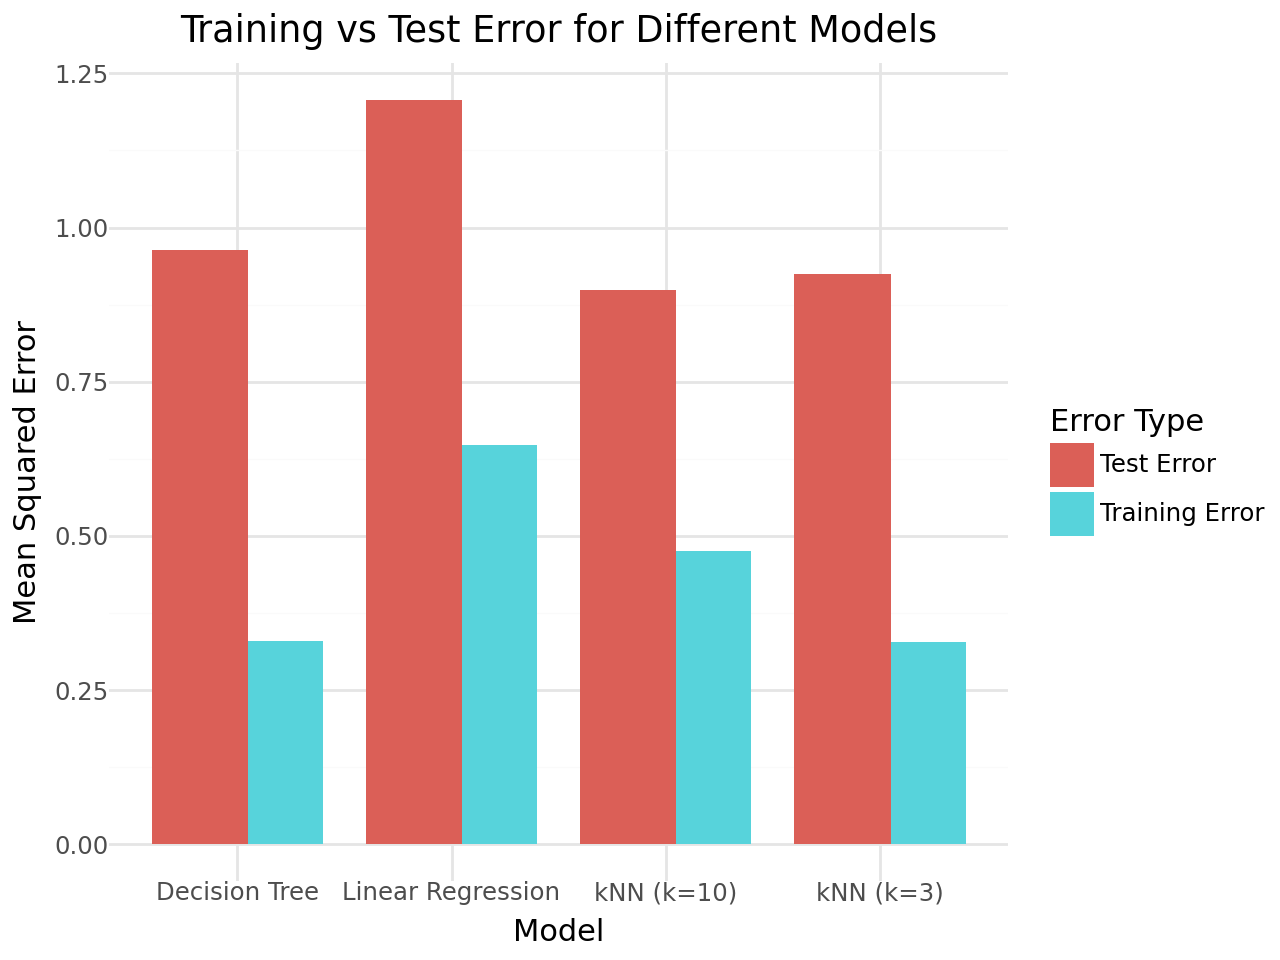

In [25]:
errors_df = pd.DataFrame({
    "Model": list(models.keys()) * 2,
    "Error Type": ["Training Error"] * len(models) + ["Test Error"] * len(models),
    "MSE": training_errors + test_errors
})

plot = (
    ggplot(errors_df, aes(x="Model", y="MSE", fill="Error Type")) +
    geom_bar(stat="identity", position=position_dodge(width=0.7)) +
    labs(
        title="Training vs Test Error for Different Models",
        x="Model",
        y="Mean Squared Error",
        fill="Error Type"
    ) +
    theme_minimal()
)

plot


KNN 10 model is the best model as it has the lowest MSE for Test data.